# Analysis of Arsta Stats

For more information on this project and to see the code as well as get the data yourself visit [github](https://github.com/lucafynn/profixio_analyser/settings)

## Load Data

Load the match data and transform it into pandas dataframes 

In [2]:
import pandas as pd
from pathlib import Path

folder_path = Path("./data/tabular_data")
dataframes = [pd.read_csv(csv) for csv in folder_path.glob("*shf*.csv")]

for df in dataframes:
    df.insert(
        2,
        "Seconds",
        df["Tid"].str.split(":").apply(lambda x: int(x[0]) * 60 + int(x[1])),
    )
    goals = df[df["Mål"].notna()]["Mål"].str.split("-", expand=True).astype("Int64")
    df.insert(4, "HomeGoals", goals[0])
    df.insert(5, "AwayGoals", goals[1])
dataframes[0].head()

,match_id,Tid,Seconds,Mål,HomeGoals,AwayGoals,Lag,Händelse,Nr,Spelare
0,32372450,1:50,110,1-1,1,1,Årsta AIK HF,Mål,15,Noak Piléus
1,32372450,3:49,229,1-2,1,2,Årsta AIK HF,Mål,27,Casper Siltala
2,32372450,5:01,301,1-3,1,3,Årsta AIK HF,Mål,7,Johan Michélsen
3,32372450,5:37,337,2-3,2,3,Hellas HK,Mål,17,Sigvard Arvidsson
4,32372450,5:47,347,3-3,3,3,Hellas HK,Mål,19,Sixten Nyhlen


We  have two datasets, one with all of the match data, and one with meta data.

For the match data we have to combine everything into one big combined dataframe to have it all centered

In [3]:
combined_df = pd.concat(dataframes, ignore_index=True, sort=False)
combined_df.head()

,match_id,Tid,Seconds,Mål,HomeGoals,AwayGoals,Lag,Händelse,Nr,Spelare
0,32372450,1:50,110,1-1,1,1,Årsta AIK HF,Mål,15,Noak Piléus
1,32372450,3:49,229,1-2,1,2,Årsta AIK HF,Mål,27,Casper Siltala
2,32372450,5:01,301,1-3,1,3,Årsta AIK HF,Mål,7,Johan Michélsen
3,32372450,5:37,337,2-3,2,3,Hellas HK,Mål,17,Sigvard Arvidsson
4,32372450,5:47,347,3-3,3,3,Hellas HK,Mål,19,Sixten Nyhlen


In [4]:
meta_info = pd.read_csv("./data/tabular_data/meta_info.csv")
meta_info.head()

,match_id,home_team,away_team,starter_home_team,starter_away_team
0,32372450,Hellas HK,Årsta AIK HF,"['Sixten Nyhlen', 'Melker Trobäck', 'David Jun...","['Johan Michélsen', 'Casper Siltala', 'Noak Pi..."
1,32372451,Täby Centrum HK,Sollentuna HK,"['Erik Cralsson', 'Fredrik Helander', 'Gustaf ...","['Henrik Fundin', 'Leonardo Varela', 'Filip Is..."
2,32372452,Solna HF,HF Lidingölaget,"['David Evgenijevski', 'Philipp Wirt', 'Simon ...","['Gustav Lönnqvist', 'Andreas Roger', 'Viktor ..."
3,32372453,Sannadals HK,Tyresö Handboll 2,"['Daniel Granholm', 'Jesper Persson', 'Victor ...","['Jonas Rasmusson', 'Oliver Bergkvist', 'Willi..."
4,32372454,HK Uppsala,Upsala IF,"['Viktor Baky', 'Viktor Persson', 'Filip Malam...","['Mikael Fredriksson', 'Dap De Bruijckere', 'V..."


## General Stats

We are gonna start with look at top scoreres and generat team stats.

First the top scorers

In [5]:
top_scorers = (
    combined_df[combined_df["Händelse"].isin(["Mål", "Mål 7-m"])]
    .groupby(["Spelare", "Lag"])
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
)

top_scorer_arsta = top_scorers[top_scorers["Lag"] == "Årsta AIK HF"]
# red_cards_arsta = reds_by_player[reds_by_player["Lag"] == "Årsta AIK HF"]
top_scorer_arsta

,Spelare,Lag,count
204,Mathias Boese,Årsta AIK HF,78
106,Gustav Bergsten,Årsta AIK HF,64
201,Markus Svensson Johnsson,Årsta AIK HF,62
152,Johan Michélsen,Årsta AIK HF,59
229,Noak Piléus,Årsta AIK HF,59
25,Astor Wintzell,Årsta AIK HF,45
181,Love Borup Olsson,Årsta AIK HF,29
199,Malte Swedberg,Årsta AIK HF,27
39,Casper Siltala,Årsta AIK HF,25
158,John Falk,Årsta AIK HF,20


Now we can look at the two mins we get by player

In [6]:
two_mins_by_player = (
    combined_df[combined_df["Händelse"] == "Utvisning"]
    .groupby(["Spelare", "Lag"])
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
)
two_mins_by_player
two_mins_arsta = two_mins_by_player[two_mins_by_player["Lag"] == "Årsta AIK HF"]
two_mins_arsta

,Spelare,Lag,count
24,Casper Siltala,Årsta AIK HF,10
84,Johan Michélsen,Årsta AIK HF,8
114,Mathias Boese,Årsta AIK HF,6
98,Love Borup Olsson,Årsta AIK HF,4
112,Markus Svensson Johnsson,Årsta AIK HF,3
99,Luca Fynn Eckelmann,Årsta AIK HF,2
14,Astor Wintzell,Årsta AIK HF,2
19,Axel Rönnberg,Årsta AIK HF,1
162,Vidar Ekeroth Mårtensson,Årsta AIK HF,1
50,Filip Grelak,Årsta AIK HF,1


How many 2mins do we receive on average and did we have any "clean" games

## Goals analysis
### 7m Efficiency

In [7]:


# Filter goals and misses
seven_min_goals = combined_df[(combined_df["Händelse"] == "Mål 7-m") & (combined_df["Lag"] == "Årsta AIK HF")]
seven_min_misses = combined_df[(combined_df["Händelse"] == "7-m miss") & (combined_df["Lag"] == "Årsta AIK HF")]

# Count goals per player
goals_per_player = seven_min_goals.groupby("Spelare").size().rename("Goals")

# Count misses per player
misses_per_player = seven_min_misses.groupby("Spelare").size().rename("Misses")

# Combine into one table
efficiency_table = pd.concat([goals_per_player, misses_per_player], axis=1).fillna(0)

efficiency_table["Goals"] = efficiency_table["Goals"].astype(int)
efficiency_table["Misses"] = efficiency_table["Misses"].astype(int)

# Calculate efficiency
efficiency_table["Attempts"] = efficiency_table["Goals"] + efficiency_table["Misses"]
efficiency_table["Efficiency (%)"] = (efficiency_table["Goals"] / efficiency_table["Attempts"]) * 100

efficiency_table = efficiency_table.sort_values(by="Attempts", ascending=False)

efficiency_table



,Goals,Misses,Attempts,Efficiency (%)
Spelare,,,,
Noak Piléus,16,5,21,76.190476
Tobias Rosengren,7,2,9,77.777778
John Falk,2,0,2,100.000000
Love Borup Olsson,1,1,2,50.000000
Vidar Ekeroth Mårtensson,2,0,2,100.000000
Casper Siltala,1,0,1,100.000000
Erik Söderblom,1,0,1,100.000000
Mathias Boese,0,1,1,0.000000


### When do we score our goals and when do we receive our goals

Now to the question, when do we actuallz score our goals. For this, I cut the dgames into to 5 minute time frames, and aggregated the plus minus goals per bin

In [8]:
# Get all matches where arsta played
meta_arsta = pd.concat(
    [
        meta_info[meta_info["away_team"] == "Årsta AIK HF"],
        meta_info[meta_info["home_team"] == "Årsta AIK HF"],
    ]
)
# get the goals closest to the end of a 5 min interval for each dataframe
stats_per_bin = pd.DataFrame()

for df in dataframes:
    if df["match_id"].iloc[0] not in list(meta_arsta["match_id"]):
        continue

    copy = df.copy()
    copy["TimeBin"] = (copy["Seconds"] // 300 + 1) * 5

    # get the plus minus at the end of the bin
    stats_last_bin = copy.groupby("TimeBin", as_index=False).last()[
        ["match_id", "Mål", "TimeBin", "HomeGoals", "AwayGoals"]
    ]

    # Determine if Årsta is away or home
    meta = meta_info[meta_info["match_id"] == df["match_id"].iloc[0]]
    arsta_is_away = meta.iloc[0]["away_team"] == "Årsta AIK HF"

    # Take the differfence
    diff_home_goals = (
        stats_last_bin["HomeGoals"] - stats_last_bin["HomeGoals"].shift(1)
    ).fillna(stats_last_bin["HomeGoals"])
    diff_away_goals = (
        stats_last_bin["AwayGoals"] - stats_last_bin["AwayGoals"].shift(1)
    ).fillna(stats_last_bin["AwayGoals"])

    # depending on if it was a home game or away game adapt Goals received and made
    if arsta_is_away:
        # correctly assign the goals made and received to arsta
        stats_last_bin["GoalsReceived"] = diff_home_goals
        stats_last_bin["GoalsMade"] = diff_away_goals

        # add enemy team
        stats_last_bin.insert(
            1, "EnemyTeam", [meta.iloc[0]["home_team"]] * stats_last_bin.shape[0]
        )

    # home game
    else:
        # same but flipped
        stats_last_bin["GoalsReceived"] = diff_away_goals
        stats_last_bin["GoalsMade"] = diff_home_goals
        stats_last_bin.insert(
            1, "EnemyTeam", [meta.iloc[0]["away_team"]] * stats_last_bin.shape[0]
        )

    stats_last_bin["PlusMinus"] = (
        stats_last_bin["GoalsMade"] - stats_last_bin["GoalsReceived"]
    )

    # Delete home and away goals since no longer needed
    del stats_last_bin["HomeGoals"]
    del stats_last_bin["AwayGoals"]

    # reorder columns: move GoalsMade and GoalsReceived before PlusMinus
    cols = stats_last_bin.columns.tolist()
    # remove them first
    cols.remove("GoalsMade")
    cols.remove("GoalsReceived")
    # insert before PlusMinus
    plusminus_idx = cols.index("PlusMinus")
    cols.insert(plusminus_idx, "GoalsReceived")
    cols.insert(plusminus_idx, "GoalsMade")
    stats_last_bin = stats_last_bin[cols]

    # rename Mål to Score
    stats_last_bin.rename(columns={"Mål": "Score"}, inplace=True)

    stats_per_bin = pd.concat([stats_per_bin, stats_last_bin])

stats_per_bin_agg = (
    stats_per_bin.groupby("TimeBin")
    .agg({"PlusMinus": "mean", "GoalsMade": "sum", "GoalsReceived": "sum"})
    .reset_index()
)
stats_per_bin_agg

,TimeBin,PlusMinus,GoalsMade,GoalsReceived
0,5,0.666667,29,21
1,10,0.75,39,30
2,15,1.083333,36,23
3,20,0.5,32,26
4,25,0.416667,34,29
5,30,0.75,33,24
6,35,0.75,33,24
7,40,0.583333,35,28
8,45,0.75,37,28
9,50,0.5,29,23


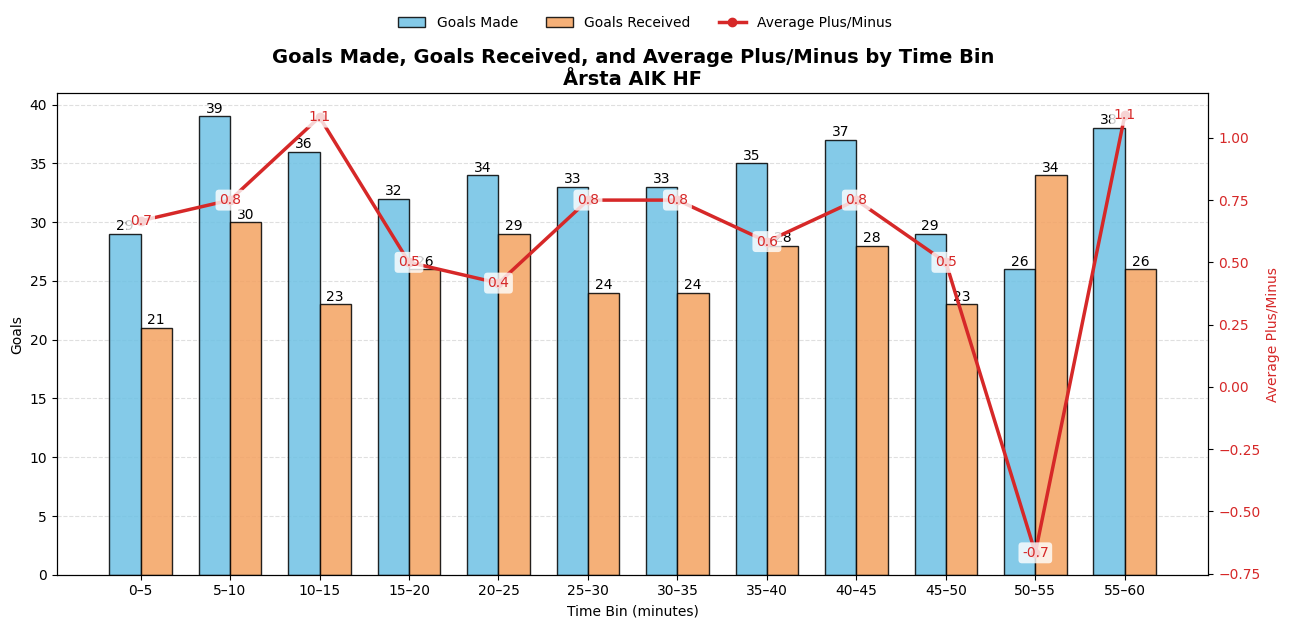

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# --- Prepare categorical x positions ---
bins = stats_per_bin_agg["TimeBin"].values
labels = [f"{int(t-5)}–{int(t)}" for t in bins]
x = np.arange(len(bins))

bar_width = 0.35

fig, ax1 = plt.subplots(figsize=(13, 6))

# --- Bars ---
bars1 = ax1.bar(
    x - bar_width / 2,
    stats_per_bin_agg["GoalsMade"],
    width=bar_width,
    label="Goals Made",
    color="#6EC1E4",
    edgecolor="black",
    alpha=0.85,
    zorder=2,
)

bars2 = ax1.bar(
    x + bar_width / 2,
    stats_per_bin_agg["GoalsReceived"],
    width=bar_width,
    label="Goals Received",
    color="#F4A261",
    edgecolor="black",
    alpha=0.85,
    zorder=2,
)

# --- Bar annotations ---
for bars in (bars1, bars2):
    for bar in bars:
        h = bar.get_height()
        ax1.text(
            bar.get_x() + bar.get_width() / 2,
            h + 0.05,
            f"{int(h)}",
            ha="center",
            va="bottom",
            fontsize=10,
            zorder=3,
        )

ax1.set_xlabel("Time Bin (minutes)")
ax1.set_ylabel("Goals", color="black")
ax1.set_xticks(x)
ax1.set_xticklabels(labels)

ax1.grid(axis="y", linestyle="--", alpha=0.4, zorder=0)

# --- Line plot (secondary axis) ---
ax2 = ax1.twinx()
ax2.plot(
    x,
    stats_per_bin_agg["PlusMinus"],
    color="#D62828",
    marker="o",
    linewidth=2.5,
    label="Average Plus/Minus",
    zorder=4,
)

# --- Line annotations (with background to avoid overlap) ---
for xi, yi in zip(x, stats_per_bin_agg["PlusMinus"]):
    ax2.text(
        xi,
        yi,
        f"{yi:.1f}",
        ha="center",
        va="center",
        fontsize=10,
        color="#D62828",
        bbox=dict(boxstyle="round,pad=0.25", fc="white", ec="none", alpha=0.8),
        zorder=5,
    )

ax2.set_ylabel("Average Plus/Minus", color="#D62828")
ax2.tick_params(axis="y", labelcolor="#D62828")

# --- Title & legend ---
plt.title(
    "Goals Made, Goals Received, and Average Plus/Minus by Time Bin\nÅrsta AIK HF",
    fontsize=14,
    weight="bold",
)

fig.legend(loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=3, frameon=False)

plt.tight_layout()
plt.show()

This graph shows, for each time bin how well we score and play defense. Eferything seems to be stable, and we score exceptionally well between the 10th and 15th minute and in the last 5 minues. But between 50 and 55 min we seem to loose the most.

This plot has the problem that it averages over all games played, so if we had an exceptuionally good or bad 5 minutes, this will skew the data. Instead, I now want to look at **how often** we lead or trail during those 5 minute time frames.

In [10]:
# Create columns for positive and negative PlusMinus occurrences
stats_per_bin['Led'] = stats_per_bin['PlusMinus'] > 0
stats_per_bin['Trailed'] = stats_per_bin['PlusMinus'] < 0
stats_per_bin['Equal'] = stats_per_bin['PlusMinus'] == 0

# Count per TimeBin
stats_per_bin_count = stats_per_bin.groupby("TimeBin").agg({
    "Led": "sum",       
    "Trailed": "sum",  
    "Equal": "sum", 
    "GoalsMade": "sum", 
    "GoalsReceived": "sum"
}).reset_index()

stats_per_bin_count


,TimeBin,Led,Trailed,Equal,GoalsMade,GoalsReceived
0,5,6,3,3,29,21
1,10,6,3,3,39,30
2,15,7,4,1,36,23
3,20,5,5,2,32,26
4,25,6,4,2,34,29
5,30,8,3,1,33,24
6,35,8,3,1,33,24
7,40,4,3,5,35,28
8,45,7,3,2,37,28
9,50,6,5,1,29,23


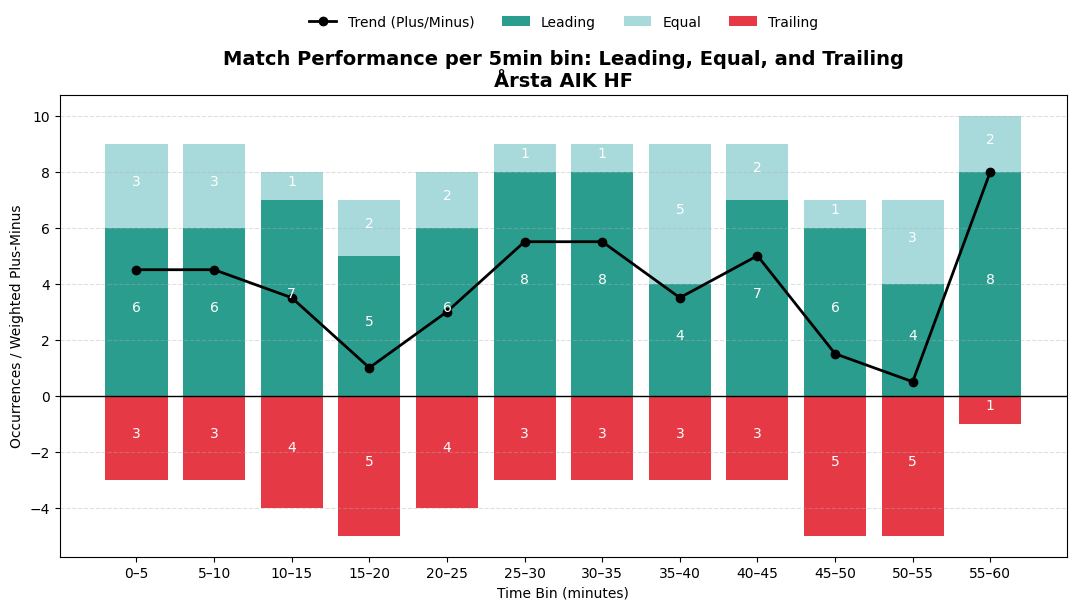

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# --- Prepare categorical x positions ---
bins = stats_per_bin_count["TimeBin"].values
labels = [f"{int(t-5)}–{int(t)}" for t in bins]
x = np.arange(len(bins))

# --- Split values ---
leading = stats_per_bin_count["Led"]
equal = stats_per_bin_count["Equal"]
trailed = stats_per_bin_count["Trailed"]

# --- Calculate plus-minus ---
weight_equal = 0.5
plus_minus = leading + equal * weight_equal - trailed

fig, ax = plt.subplots(figsize=(13, 6))

# --- Stacked bars: Leading + Equal as good, Trailed as bad ---
ax.bar(x, leading, color="#2A9D8F", label="Leading")
ax.bar(x, equal, bottom=leading, color="#A8DADC", label="Equal")
ax.bar(x, -trailed, color="#E63946", label="Trailing")

# --- Plus-minus line ---
ax.plot(x, plus_minus, color="black", marker="o", linewidth=2, label="Trend (Plus/Minus)")

# --- Value annotations ---
for xi, l, e, t in zip(x, leading, equal, trailed):
    ax.text(xi, l / 2, int(l), ha="center", color="white", fontsize=10)           # Leading
    ax.text(xi, l + e / 2, int(e), ha="center", color="white", fontsize=10)       # Equal
    ax.text(xi, -t / 2, int(t), ha="center", color="white", fontsize=10)          # Trailed

# --- Axes & grid ---
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel("Time Bin (minutes)")
ax.set_ylabel("Occurrences / Weighted Plus-Minus")
ax.axhline(0, color="black", linewidth=1)
ax.grid(axis="y", linestyle="--", alpha=0.4)

# --- Title & legend ---
ax.set_title(
    "Match Performance per 5min bin: Leading, Equal, and Trailing\nÅrsta AIK HF",
    fontsize=14,
    weight="bold",
)

ax.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, 1.2),  # move higher
    ncol=4,
    frameon=False,
)


plt.show()


This shows a slioghtly diffnerent trend. In the first half we seem to start well and end well, with only a dip between minute 15 to 20. In the second half however, even though we play the last and first 5mins we often lead, we seem to perform not as well between min utes 35-40 as well as 50-55. This shows that we generally hit a slump during the middle of each half

## 7min suspensions
### How well do we execute with 5vs6?

So now I want to see how we execute in a 5vs6, i.e. when we have a 2min.

In [12]:
two_mins_arsta

,Spelare,Lag,count
24,Casper Siltala,Årsta AIK HF,10
84,Johan Michélsen,Årsta AIK HF,8
114,Mathias Boese,Årsta AIK HF,6
98,Love Borup Olsson,Årsta AIK HF,4
112,Markus Svensson Johnsson,Årsta AIK HF,3
99,Luca Fynn Eckelmann,Årsta AIK HF,2
14,Astor Wintzell,Årsta AIK HF,2
19,Axel Rönnberg,Årsta AIK HF,1
162,Vidar Ekeroth Mårtensson,Årsta AIK HF,1
50,Filip Grelak,Årsta AIK HF,1


In [13]:
meta_arsta

,match_id,home_team,away_team,starter_home_team,starter_away_team
0,32372450,Hellas HK,Årsta AIK HF,"['Sixten Nyhlen', 'Melker Trobäck', 'David Jun...","['Johan Michélsen', 'Casper Siltala', 'Noak Pi..."
12,32372462,Tyresö Handboll 2,Årsta AIK HF,"['Niklas Lindberg', 'William Attebrant', 'Gust...","['Kristoffer Karlsson', 'Tobias Rosengren', 'A..."
27,32372477,Solna HF,Årsta AIK HF,"['Axel Ulvselius', 'Axel Hjalmarson', 'Simon L...","['Noak Piléus', 'Malte Swedberg', 'Kristoffer ..."
40,32372490,HF Lidingölaget,Årsta AIK HF,"['Daniel Norrby', 'William Borg', 'Ludvig Mask...","['Kristoffer Karlsson', 'Noak Piléus', 'Johan ..."
51,32372501,Sollentuna HK,Årsta AIK HF,"['Eddie Pernikliski', 'Filip Isaksson', 'Gusta...","['Tobias Rosengren', 'Noak Piléus', 'Johan Mic..."
60,32372510,Upsala IF,Årsta AIK HF,"['Mikael Fredriksson', 'Linus Henriksson', 'Jo...","['Kristoffer Karlsson', 'Tobias Rosengren', 'M..."
10,32372460,Årsta AIK HF,SK Kvarnberga,"['Tobias Rosengren', 'Gustav Bergsten', 'Noak ...","['Nicklas Andreasson', 'Fredrik Andreasson', '..."
20,32372470,Årsta AIK HF,Sannadals HK,"['Noak Piléus', 'Gustav Bergsten', 'Markus Sve...","['Karl Lundqvist Karlsson', 'Joakim Bärleving-..."
32,32372482,Årsta AIK HF,Täby Centrum HK,"['Kristoffer Karlsson', 'Malte Swedberg', 'Gus...","['Tintin Björnsson', 'Erik Carlsson', 'Malte P..."
45,32372495,Årsta AIK HF,HK Uppsala,"['Tobias Rosengren', 'Malte Swedberg', 'Casper...","['Simon Holm', 'Einar Sandström', 'Axel Åkerud..."


In [14]:
plusminus_during_penalties_per_match = {}
plusminus_in_majority_per_match = {}

for df in dataframes:
    if df["match_id"].iloc[0] not in list(meta_arsta["match_id"]):
        continue

    # Get enemy team name also if it is the home or away 
    enemy_team = meta_arsta[meta_arsta["match_id"] == df["match_id"].iloc[0]]["away_team"].iloc[0] if meta_arsta[meta_arsta["match_id"] == df["match_id"].iloc[0]]["home_team"].iloc[0] == "Årsta AIK HF" else meta_arsta[meta_arsta["match_id"] == df["match_id"].iloc[0]]["home_team"].iloc[0]

    # get the excact match name for the current dataframe
    match = meta_arsta[meta_arsta["match_id"] == df["match_id"].iloc[0]]["away_team"].iloc[0] + " - " + meta_arsta[meta_arsta["match_id"] == df["match_id"].iloc[0]]["home_team"].iloc[0]
    #print(enemy_team, match)
    
    # Initialize dict for penalties and get the plusminus during penalties
    plusminus_during_penalties_per_match[match] = []
    utvisningar = df[(df['Händelse']=='Utvisning') & (df['Lag']=='Årsta AIK HF')][["Seconds", 'Spelare']]
    #print(utvisningar)
    for utvisning in utvisningar["Seconds"]:
        plusminus = 0
        utvisning_ends = utvisning + 2*60
        #print(utvisning, utvisning_ends )
        goals = df[(df['Seconds'] > utvisning) & (df['Seconds'] < utvisning_ends) & (df['Händelse']=='Mål')]
        for goals in goals.itertuples():
            if goals.Lag == "Årsta AIK HF":
                plusminus +=1
            else:
                plusminus -=1
        #print("PlusMinus during 2-min utvisning:", plusminus)
        plusminus_during_penalties_per_match[match].append(plusminus)

    #Initialize dict for majority and get the plusminus during majority
    plusminus_in_majority_per_match[match] = []
    majorities= df[(df['Händelse']=='Utvisning') & (df['Lag']==enemy_team)]["Seconds"]
    #print(majorities)
    for majority in majorities:
        plusminus = 0
        majority_ends = majority + 2*60
        goals = df[(df['Seconds'] > majority) & (df['Seconds'] < majority_ends) & (df['Händelse']=='Mål')]
        for goals in goals.itertuples():
            if goals.Lag == "Årsta AIK HF":
                plusminus +=1
            else:
                plusminus -=1
        #print("PlusMinus during majority:", plusminus)
        plusminus_in_majority_per_match[match].append(plusminus)



plusminus_during_penalties_per_match 

{'Årsta AIK HF - Hellas HK': [1],
 'SK Kvarnberga - Årsta AIK HF': [-1, -2, -1],
 'Årsta AIK HF - Tyresö Handboll 2': [-2, 1],
 'Sannadals HK - Årsta AIK HF': [0, 0],
 'Årsta AIK HF - Solna HF': [1, -1, -1],
 'Täby Centrum HK - Årsta AIK HF': [0, 0],
 'Årsta AIK HF - HF Lidingölaget': [1, 2],
 'HK Uppsala - Årsta AIK HF': [1, -1],
 'Årsta AIK HF - Sollentuna HK': [-1],
 'Hammarby IF HF 2 - Årsta AIK HF': [],
 'Årsta AIK HF - Upsala IF': [-2, -2, 0, 1, -2],
 'Sollentuna HK - Årsta AIK HF': [0, 0, 0, -1]}

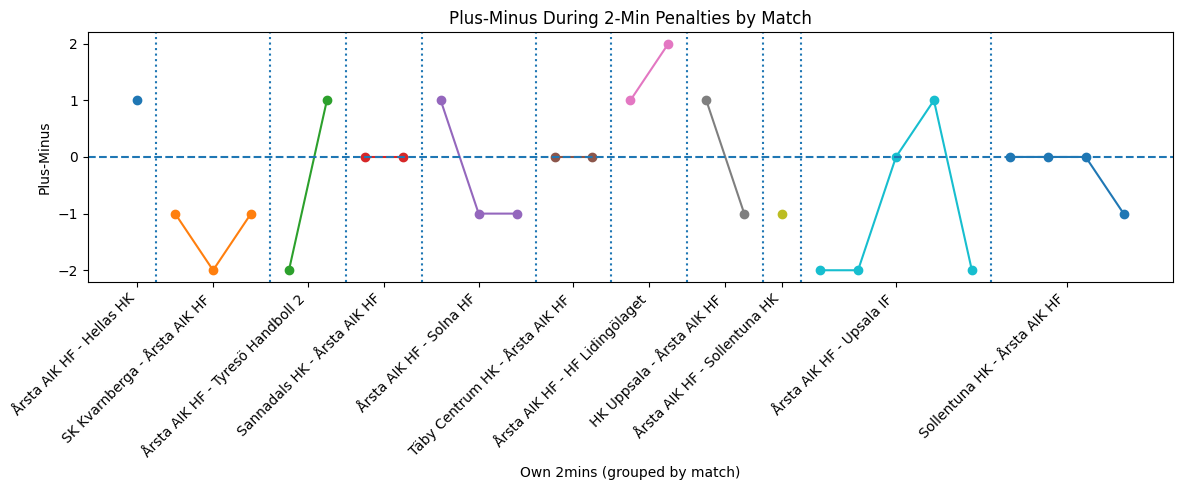

In [15]:
plt.figure(figsize=(12,5))

current_index = 0
segment_centers = []
segment_labels = []
match_boundaries = []

for match, vals in plusminus_during_penalties_per_match.items():
    if not vals:   #skip matches with no data
        continue
    n = len(vals)
    indices = range(current_index, current_index + n)

    # plot segment
    plt.plot(indices, vals, marker='o')

    # store center for label
    center = current_index + (n - 1) / 2
    segment_centers.append(center)
    segment_labels.append(match)

    current_index += n
    match_boundaries.append(current_index - 0.5)

# zero reference line
plt.axhline(0, linestyle='--')

# vertical separators between matches
for boundary in match_boundaries[:-1]:
    plt.axvline(boundary, linestyle=':')

# match labels on x-axis
plt.xticks(segment_centers, segment_labels, rotation=45, ha='right')

plt.xlabel('Own 2mins (grouped by match)')
plt.ylabel('Plus-Minus')
plt.title('Plus-Minus During 2-Min Penalties by Match')
plt.tight_layout()
plt.show()


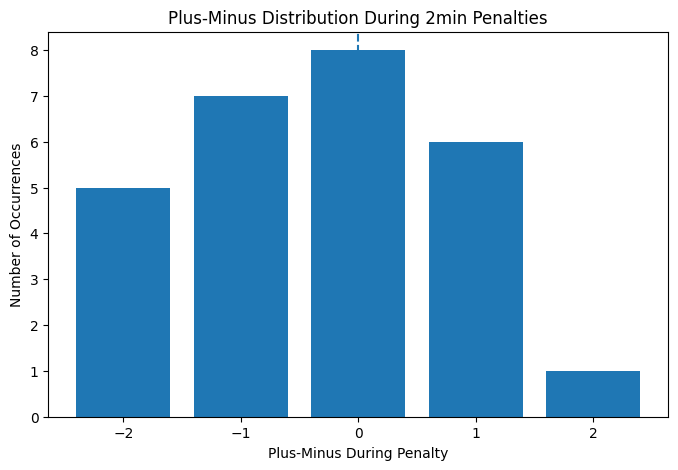

In [16]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# flatten all values across matches
all_values = [
    val
    for match_vals in plusminus_during_penalties_per_match.values()
    for val in match_vals
]

counts = Counter(all_values)
x = sorted(counts.keys())
y = [counts[v] for v in x]

plt.figure(figsize=(8,5))
plt.bar(x, y)
plt.axvline(0, linestyle='--')
plt.xlabel('Plus-Minus During Penalty')
plt.ylabel('Number of Occurrences')
plt.title('Plus-Minus Distribution During 2min Penalties')
plt.show()


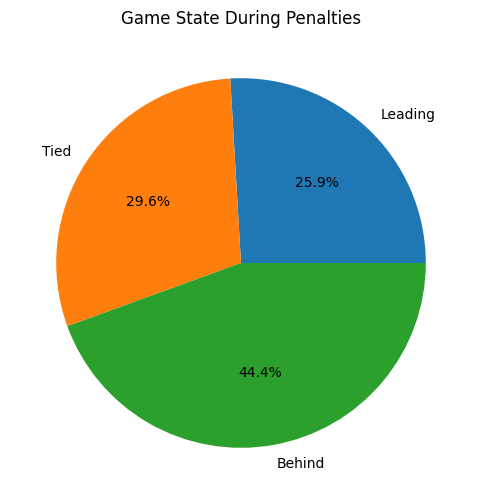

In [17]:
values = np.array(all_values)

leading = (values > 0).sum()
tied = (values == 0).sum()
behind = (values < 0).sum()

plt.figure(figsize=(6,6))
plt.pie(
    [leading, tied, behind],
    labels=['Leading', 'Tied', 'Behind'],
    autopct='%1.1f%%'
)
plt.title('Game State During Penalties')
plt.show()


### How well do we execute with 6 vs 5?

So now I want to see how we execute in a 5vs6, i.e.  in majority

In [18]:
plusminus_in_majority_per_match

{'Årsta AIK HF - Hellas HK': [0, 1, 2, 1],
 'SK Kvarnberga - Årsta AIK HF': [1, 1],
 'Årsta AIK HF - Tyresö Handboll 2': [1],
 'Sannadals HK - Årsta AIK HF': [2, 2, 0],
 'Årsta AIK HF - Solna HF': [0, -2, 1, 1, 0],
 'Täby Centrum HK - Årsta AIK HF': [0, 1],
 'Årsta AIK HF - HF Lidingölaget': [1],
 'HK Uppsala - Årsta AIK HF': [0],
 'Årsta AIK HF - Sollentuna HK': [0],
 'Hammarby IF HF 2 - Årsta AIK HF': [0],
 'Årsta AIK HF - Upsala IF': [0],
 'Sollentuna HK - Årsta AIK HF': [1, 0]}

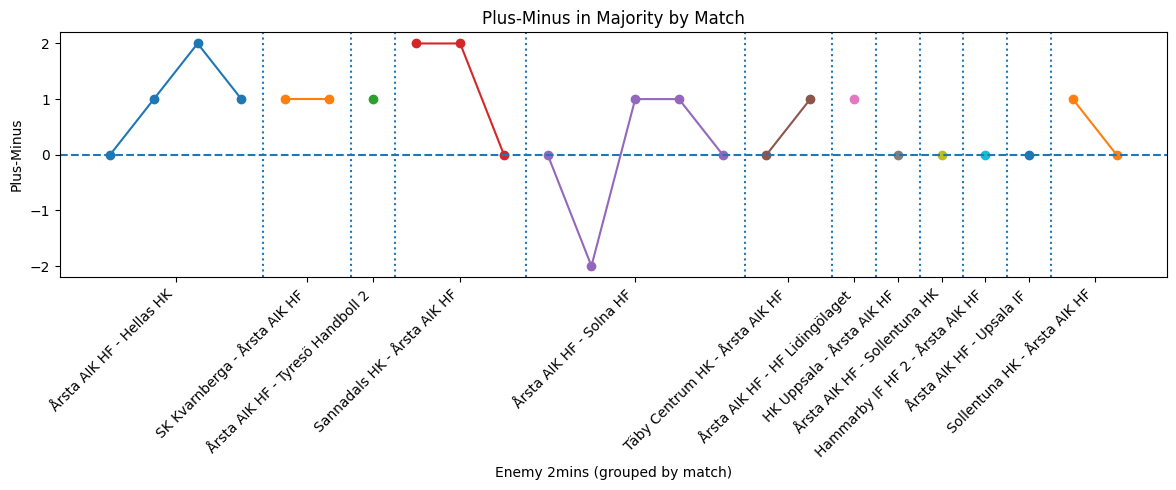

In [19]:
plt.figure(figsize=(12,5))

current_index = 0
segment_centers = []
segment_labels = []
match_boundaries = []

for match, vals in plusminus_in_majority_per_match.items():
    if not vals:   #skip matches with no data
        continue
    n = len(vals)
    indices = range(current_index, current_index + n)

    # plot segment
    plt.plot(indices, vals, marker='o')

    # store center for label
    center = current_index + (n - 1) / 2
    segment_centers.append(center)
    segment_labels.append(match)

    current_index += n
    match_boundaries.append(current_index - 0.5)

# zero reference line
plt.axhline(0, linestyle='--')

# vertical separators between matches
for boundary in match_boundaries[:-1]:
    plt.axvline(boundary, linestyle=':')

# match labels on x-axis
plt.xticks(segment_centers, segment_labels, rotation=45, ha='right')

plt.xlabel('Enemy 2mins (grouped by match)')
plt.ylabel('Plus-Minus')
plt.title('Plus-Minus in Majority by Match')
plt.tight_layout()
plt.show()


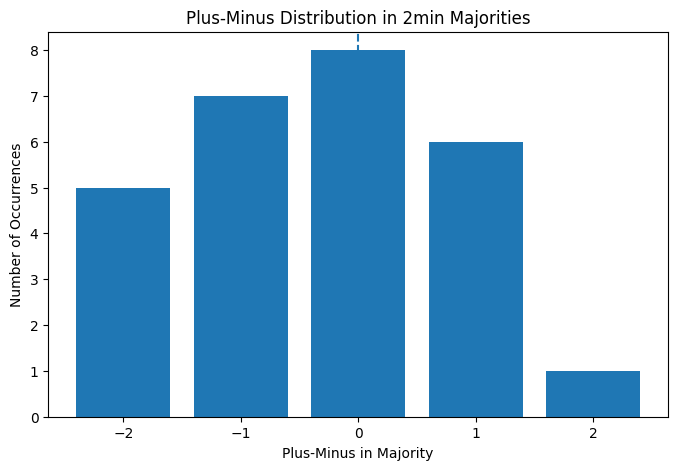

In [20]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# flatten all values across matches
all_values_majority = [
    val
    for match_vals in plusminus_in_majority_per_match.values()
    for val in match_vals
]

counts = Counter(all_values)
x = sorted(counts.keys())
y = [counts[v] for v in x]

plt.figure(figsize=(8,5))
plt.bar(x, y)
plt.axvline(0, linestyle='--')
plt.xlabel('Plus-Minus in Majority')
plt.ylabel('Number of Occurrences')
plt.title('Plus-Minus Distribution in 2min Majorities')
plt.show()


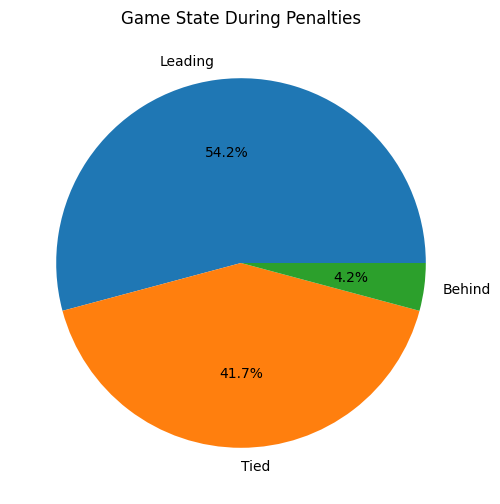

In [21]:
values_majority = np.array(all_values_majority)

leading = (values_majority > 0).sum()
tied = (values_majority == 0).sum()
behind = (values_majority < 0).sum()

plt.figure(figsize=(6,6))
plt.pie(
    [leading, tied, behind],
    labels=['Leading', 'Tied', 'Behind'],
    autopct='%1.1f%%'
)
plt.title('Game State During Penalties')
plt.show()
